# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

In [ ]:
!wget http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
!wget http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip

--2024-04-19 17:55:07--  http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304771808 (291M) [application/zip]
Saving to: ‘Stanford40_JPEGImages.zip’

Stanford40_JPEGImag 100%[===================>] 290.65M  10.9MB/s    in 30s     

2024-04-19 17:55:37 (9.62 MB/s) - ‘Stanford40_JPEGImages.zip’ saved [304771808/304771808]

--2024-04-19 17:55:37--  http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62010 (61K) [application/zip]
Saving to: ‘Stanford40_ImageSplits.zip’

Stanford40_ImageSpl 100%[===================>]  60.56K  --.-KB/s    in 0.04s   

2024-0

### Unzip it

In [ ]:
!unzip Stanford40_JPEGImages.zip -d Stanford40/
!unzip Stanford40_ImageSplits.zip -d Stanford40/

Streaming output truncated to the last 5000 lines.
  inflating: Stanford40/JPEGImages/phoning_213.jpg  
  inflating: Stanford40/JPEGImages/phoning_214.jpg  
  inflating: Stanford40/JPEGImages/phoning_215.jpg  
  inflating: Stanford40/JPEGImages/phoning_216.jpg  
  inflating: Stanford40/JPEGImages/phoning_217.jpg  
  inflating: Stanford40/JPEGImages/phoning_218.jpg  
  inflating: Stanford40/JPEGImages/phoning_219.jpg  
  inflating: Stanford40/JPEGImages/phoning_220.jpg  
  inflating: Stanford40/JPEGImages/phoning_221.jpg  
  inflating: Stanford40/JPEGImages/phoning_222.jpg  
  inflating: Stanford40/JPEGImages/phoning_223.jpg  
  inflating: Stanford40/JPEGImages/phoning_224.jpg  
  inflating: Stanford40/JPEGImages/phoning_225.jpg  
  inflating: Stanford40/JPEGImages/phoning_226.jpg  
  inflating: Stanford40/JPEGImages/phoning_227.jpg  
  inflating: Stanford40/JPEGImages/phoning_228.jpg  
  inflating: Stanford40/JPEGImages/phoning_229.jpg  
  inflating: Stanford40/JPEGImages/phoning_230.j

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [15]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse",
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    keep_stanford40_train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    keep_stanford40_train_labels = ['_'.join(name.split('_')[:-1]) for name in keep_stanford40_train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    keep_stanford40_test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    keep_stanford40_test_labels = ['_'.join(name.split('_')[:-1]) for name in keep_stanford40_test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
keep_stanford40_all_files = keep_stanford40_train_files + keep_stanford40_test_files
keep_stanford40_all_labels = keep_stanford40_train_labels + keep_stanford40_test_labels
keep_stanford40_train_files, keep_stanford40_test_files = train_test_split(keep_stanford40_all_files, test_size=0.1, random_state=0, stratify=keep_stanford40_all_labels)
keep_stanford40_train_labels = ['_'.join(name.split('_')[:-1]) for name in keep_stanford40_train_files]
keep_stanford40_test_labels = ['_'.join(name.split('_')[:-1]) for name in keep_stanford40_test_files]
print(f'Train files ({len(keep_stanford40_train_files)}):\n\t{keep_stanford40_train_files}')
print(f'Train labels ({len(keep_stanford40_train_labels)}):\n\t{keep_stanford40_train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(keep_stanford40_train_labels)).items())}\n')
print(f'Test files ({len(keep_stanford40_test_files)}):\n\t{keep_stanford40_test_files}')
print(f'Test labels ({len(keep_stanford40_test_labels)}):\n\t{keep_stanford40_test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(keep_stanford40_test_labels)).items())}\n')
action_categories = sorted(list(set(keep_stanford40_train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

### Visualize a photo from the training files and also print its label

An image with the label - climbing


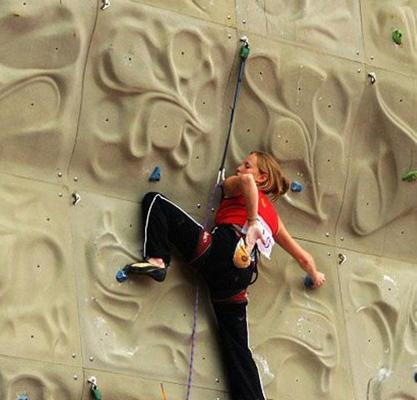

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image_no = 300  # change this to a number between [0, 1200] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{keep_stanford40_train_files[image_no]}')
print(f'An image with the label - {keep_stanford40_train_labels[image_no]}')
cv2_imshow(img)

# Human Motion Database 51 (HMDB51)
### Download the dataset

In [3]:
# Download HMDB51 data and splits from serre lab website
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


# Extract and organize the data.

In [9]:
! mkdir -p video_data test_train_splits
! unrar e test_train_splits.rar test_train_splits
! rm test_train_splits.rar
! unrar e hmdb51_org.rar
! rm hmdb51_org.rar
! mv *.rar video_data
import os
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse",
        "run", "shoot_bow", "smoke", "throw", "wave"]
for files in os.listdir('video_data'):
    foldername = files.split('.')[0]
    if foldername in keep_hmdb51:
      # extract only the relevant classes for the assignment.
      os.system("mkdir -p video_data/" + foldername)
      os.system("unrar e video_data/"+ files + " video_data/"+foldername)

! rm video_data/*.rar


# Split the dataset into train and test

In [24]:
import glob,os
from collections import Counter
from sklearn.model_selection import train_test_split
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse",
        "run", "shoot_bow", "smoke", "throw", "wave"]
TRAIN_TAG, TEST_TAG = 1, 2
train_files, test_files = [], []
train_labels, test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('/')[-1].split('_')[:-2])
    class_name = class_name.split('\\')[-1]
    print(class_name)
    if class_name not in keep_hmdb51:
        continue
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files.append(video_filename)
            train_labels.append(class_name)
        elif tag == TEST_TAG:
            test_files.append(video_filename)
            test_labels.append(class_name)

print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

brush_hair
cartwheel
catch
chew
clap
climb_stairs
climb
dive
draw_sword
dribble
drink
eat
fall_floor
fencing
flic_flac
golf
handstand
hit
hug
jump
kick_ball
kick
kiss
laugh
pick
pour
pullup
punch
pushup
push
ride_bike
ride_horse
run
shake_hands
shoot_ball
shoot_bow
shoot_gun
situp
sit
smile
smoke
somersault
stand
swing_baseball
sword_exercise
sword
talk
throw
turn
walk
wave
Train files (840):
	['#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_

In [2]:
from torch.utils.data import Dataset
from PIL import Image

class Stanford40Dataset(Dataset):
    def __init__(self, file_names, labels, root_dir, transform=None):
        """
        Args:
            file_names (list): List of file names.
            labels (list): List of labels corresponding to each file.
            root_dir (str): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.file_names = file_names
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
        self.label_to_idx = {label: idx for idx, label in enumerate(sorted(set(labels)))}

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.file_names[idx])
        image = Image.open(img_name).convert('RGB')
        label = self.label_to_idx[self.labels[idx]]

        if self.transform:
            image = self.transform(image)

        return image, label

In [17]:
import os
from torchvision import transforms
import torch
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset , Subset
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from sklearn.model_selection import train_test_split

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset paths
root_dir = 'Stanford40/JPEGImages/'

# Initialize datasets
train_dataset = Stanford40Dataset(keep_stanford40_train_files, keep_stanford40_train_labels, root_dir, transform)
test_dataset = Stanford40Dataset(keep_stanford40_test_files, keep_stanford40_test_labels, root_dir, transform)
print(len(train_dataset))  
print(len(keep_stanford40_train_labels)) 

# Stratified split for train and validation
validation_fraction = 0.2
train_indices, val_indices = train_test_split(
    list(range(0,len(train_dataset),1)),
    test_size=validation_fraction,
    stratify=keep_stanford40_train_labels,
    random_state=42
)

# Creating subsets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Creating DataLoaders
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=0)
val_loader = DataLoader(val_subset, batch_size=64, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)


2733
2733


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the model
model = models.resnet18(pretrained=True)
num_classes = 12
model.fc = nn.Linear(model.fc.in_features, num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = model.to(device)

num_epochs = 5

# Lists
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training and validation loops
for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Evaluate
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    # Results
    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracy}%, Val Loss: {val_losses[-1]}, Val Accuracy: {val_accuracy}%")

# Plots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#SAVE MODEL WEIGHTS
torch.save(model.state_dict(), 'stanford40.pth')

In [ ]:
## EVALUATE ##
import torch
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms

model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 12)
model_path = 'stanford40.pth'
state_dict = torch.load(model_path)
model.load_state_dict(state_dict)
model.eval()

def evaluate_model(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Evaluate
accuracy = evaluate_model(model, test_loader)
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}')


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torchsummary import summary

#modified ResNet18 model
model = models.resnet18(pretrained=True)
num_classes = 12 
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load  weights
model.load_state_dict(torch.load('stanford40.pth', map_location=torch.device('cpu')))
model.eval() 

# Display the model summary
summary(model, (3, 224, 224))

#total number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {total_params}')

##CHOISE 1

In [ ]:
## CHOICE 1 ##
import os
from torchvision import transforms
import torch
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset , Subset
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from sklearn.model_selection import train_test_split

# Transformations
# Transformations with Data Augmentation for Training & Test
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(15),       # Random rotation by +/- 15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color jitter
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Standard Transformations for Testing
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset paths
root_dir = 'Stanford40/JPEGImages/'

# Initialize datasets
train_dataset = Stanford40Dataset(keep_stanford40_train_files, keep_stanford40_train_labels, root_dir, train_transform)
test_dataset = Stanford40Dataset(keep_stanford40_test_files, keep_stanford40_test_labels, root_dir, test_transform)
print(len(train_dataset)) 
print(len(keep_stanford40_train_labels))  

# Stratified split for train and validation
validation_fraction = 0.2
train_indices, val_indices = train_test_split(
    list(range(0,len(train_dataset),1)),
    test_size=validation_fraction,
    stratify=keep_stanford40_train_labels,
    random_state=42
)

# Creating subsets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Creating DataLoaders
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_subset, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

In [ ]:
## DISPLAY CHANGES ##
import matplotlib.pyplot as plt
import numpy as np
import torchvision
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def show_dataloader_images(dataloader):
    inputs, classes = next(iter(dataloader))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    imshow(out)

#  Validation Set
plt.figure(figsize=(10, 10))
plt.suptitle('Validation Set Images')
show_dataloader_images(val_loader)

#  Test Set
plt.figure(figsize=(10, 10))
plt.suptitle('Test Set Images')
show_dataloader_images(test_loader)

plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the model 
model = models.resnet18(pretrained=True)
num_classes = 12
model.fc = nn.Linear(model.fc.in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = model.to(device)

num_epochs = 12

# Lists 
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training and validation loops
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Evaluate
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    # results
    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracy}%, Val Loss: {val_losses[-1]}, Val Accuracy: {val_accuracy}%")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#SAVE MODEL WEIGHTS
torch.save(model.state_dict(), 'stanford40_augmentation.pth')

In [ ]:
## EVALUATE ##
import torch
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms

model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 12)
# Load the state dictionary
model_path = 'stanford40_augmentation.pth'
state_dict = torch.load(model_path)
model.load_state_dict(state_dict)
model.eval()

def evaluate_model(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Evaluate 
accuracy = evaluate_model(model, test_loader)
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')


## CHOICE 3

In [ ]:
from torch.optim.lr_scheduler import CyclicLR

import os
from torchvision import transforms
import torch
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset , Subset
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from sklearn.model_selection import train_test_split

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset paths
root_dir = 'Stanford40/JPEGImages/'

# Initialize datasets
train_dataset = Stanford40Dataset(keep_stanford40_train_files, keep_stanford40_train_labels, root_dir, transform)
test_dataset = Stanford40Dataset(keep_stanford40_test_files, keep_stanford40_test_labels, root_dir, transform)
print(len(train_dataset))
print(len(keep_stanford40_train_labels)) 

# Stratified split for train and validation
validation_fraction = 0.2
train_indices, val_indices = train_test_split(
    list(range(0,len(train_dataset),1)),
    test_size=validation_fraction,
    stratify=keep_stanford40_train_labels,
    random_state=42
)

# Creating subsets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Creating DataLoaders
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_subset, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.optim import SGD
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the model 
model = models.resnet18(pretrained=True)
num_classes = 12
model.fc = nn.Linear(model.fc.in_features, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
# Define the scheduler
step_size_up = len(train_loader)/2  # Number of iterations in half a cycle; typically 2-8 times the iterations in an epoch
scheduler = CyclicLR(
    optimizer,
    base_lr=0.0001,  
    max_lr=0.01,     
    step_size_up=len(train_loader), 
    mode='triangular2'  
)
model = model.to(device)

num_epochs = 5

# Lists
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training and validation loops
for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()  # Update the learning rate and momentum

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Evaluate
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    # results
    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracy}%, Val Loss: {val_losses[-1]}, Val Accuracy: {val_accuracy}%")

# Plotting the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Task 2

In [120]:
# video data directory
video_data_dir = 'video_data'

# Construct paths for training and testing
train_video_paths = [os.path.join(video_data_dir, label, file) for file, label in zip(train_files, train_labels)]
test_video_paths = [os.path.join(video_data_dir, label, file) for file, label in zip(test_files, test_labels)]

middle_frame_dir = 'middle_frame_data'
os.makedirs(middle_frame_dir, exist_ok=True)

def extract_middle_frame(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file {video_path}")
        return

    # Get the total number of frames and calculate the desired frame
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    middle_frame_index = total_frames * 3 / 4

    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_index)

    ret, frame = cap.read()
    if not ret:
        print(f"Error reading frame from {video_path}")
        return

    cv2.imwrite(output_path, frame)

    cap.release()

for video_path, label in zip(train_video_paths, train_labels):
    class_output_dir = os.path.join(middle_frame_dir, label)
    os.makedirs(class_output_dir, exist_ok=True)

    video_filename = os.path.basename(video_path)
    output_filename = os.path.splitext(video_filename)[0] + '_middle.jpg'
    output_path = os.path.join(class_output_dir, output_filename)

    extract_middle_frame(video_path, output_path)

middle_frame_dir_test= 'middle_frame_test_data'
#  test videos
for video_path, label in zip(test_video_paths, test_labels):
    class_output_dir = os.path.join(middle_frame_dir_test, label)
    os.makedirs(class_output_dir, exist_ok=True)

    video_filename = os.path.basename(video_path)
    output_filename = os.path.splitext(video_filename)[0] + '_middle.jpg'
    output_path = os.path.join(class_output_dir, output_filename)

    # Call a function to extract and save middle frame
    extract_middle_frame(video_path, output_path)

In [121]:
#DATALOADING
from torch.utils.data import Dataset
from PIL import Image

class MiddleFrameDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.label_to_idx = {label: idx for idx, label in enumerate(sorted(set(labels)))}
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        label = self.label_to_idx[self.labels[idx]]

        if self.transform:
            image = self.transform(image)

        return image, label

# Modify the paths to point to the specific frame images
train_middle_frame_paths = [os.path.join(middle_frame_dir, label, os.path.splitext(os.path.basename(file))[0] + '_middle.jpg') for file, label in zip(train_files, train_labels)]
print(train_middle_frame_paths)
# Split the training data
train_paths, val_paths, train_subset_labels, val_labels = train_test_split(
    train_middle_frame_paths,
    train_labels,
    test_size=0.2,
    stratify=train_labels,
    random_state=42
)

# Initialize the datasets
train_dataset = MiddleFrameDataset(train_paths, train_subset_labels, transform=transform)
val_dataset = MiddleFrameDataset(val_paths, val_labels, transform=transform)

# Initialize the DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)

['middle_frame_data\\clap\\#20_Rhythm_clap_u_nm_np1_fr_goo_0_middle.jpg', 'middle_frame_data\\clap\\#20_Rhythm_clap_u_nm_np1_fr_goo_1_middle.jpg', 'middle_frame_data\\clap\\#20_Rhythm_clap_u_nm_np1_fr_goo_2_middle.jpg', 'middle_frame_data\\clap\\#20_Rhythm_clap_u_nm_np1_le_goo_3_middle.jpg', 'middle_frame_data\\clap\\#20_Rhythm_clap_u_nm_np1_le_goo_4_middle.jpg', 'middle_frame_data\\clap\\A_Round_of_Applause_clap_u_cm_np1_fr_med_0_middle.jpg', 'middle_frame_data\\clap\\A_Round_of_Applause_clap_u_cm_np1_fr_med_1_middle.jpg', 'middle_frame_data\\clap\\Applauding_Abby_clap_u_nm_np1_fr_med_0_middle.jpg', 'middle_frame_data\\clap\\Applauding_Abby_clap_u_nm_np1_fr_med_1_middle.jpg', 'middle_frame_data\\clap\\Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0_middle.jpg', 'middle_frame_data\\clap\\Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1_middle.jpg', 'middle_frame_data\\clap\\Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2_middle.jpg', 'middle_frame_data\\clap\\Boom_Snap_Clap_clap_u_nm

In [122]:
# Modify the paths to point to the specific frame images for test data
test_middle_frame_paths = [os.path.join(middle_frame_dir_test, label, os.path.splitext(os.path.basename(file))[0] + '_middle.jpg') for file, label in zip(test_files, test_labels)]
print(test_middle_frame_paths)

# Initialize the dataset for test data
test_dataset = MiddleFrameDataset(test_middle_frame_paths, test_labels, transform=transform)

# Initialize the DataLoader for the test dataset
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=0)

['middle_frame_test_data\\clap\\103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_cm_np1_fr_med_1_middle.jpg', 'middle_frame_test_data\\clap\\103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_nm_np1_fr_med_0_middle.jpg', 'middle_frame_test_data\\clap\\Aishwarya_Rai_Burns_David_Letterman_in_his_own_show_clap_u_cm_np1_fr_bad_1_middle.jpg', 'middle_frame_test_data\\clap\\Alex_applauding_himself_clap_u_cm_np1_fr_med_1_middle.jpg', 'middle_frame_test_data\\clap\\Alex_applauding_himself_clap_u_nm_np1_fr_med_0_middle.jpg', 'middle_frame_test_data\\clap\\Finding_Forrester_3_clap_u_nm_np1_ri_med_0_middle.jpg', 'middle_frame_test_data\\clap\\LetThePeopleClap_clap_u_cm_np1_fr_med_1_middle.jpg', 'middle_frame_test_data\\clap\\LetThePeopleClap_clap_u_cm_np1_fr_med_2_middle.jpg', 'middle_frame_test_data\\clap\\Martin_klatscht_in_die_h_nde_und_FURZT_clap_u_cm_np1_fr_med_0_middle.jpg', 'middle_frame_test_data\\clap\\Return_of_the_King_1

In [ ]:
import matplotlib.pyplot as plt

def show_images(data_loader, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    images, labels = next(iter(data_loader))
    for i in range(num_images):
        ax = axes[i] if num_images > 1 else axes
        image = images[i].numpy().transpose(1, 2, 0)
        ax.imshow(image)
        ax.set_title(f'Label: {labels[i].item()}')
        ax.axis('off')
    plt.show()
show_images(test_loader)

Using device: cuda


C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Train Loss: 2.7080236023122612, Train Accuracy: 40.92261904761905%, Val Loss: 2.4906681378682456, Val Accuracy: 46.42857142857143%
Epoch 2, Train Loss: 1.005397466096011, Train Accuracy: 71.42857142857143%, Val Loss: 1.9832236766815186, Val Accuracy: 56.54761904761905%
Epoch 3, Train Loss: 0.5237391320141879, Train Accuracy: 85.71428571428571%, Val Loss: 1.7379560073216755, Val Accuracy: 61.904761904761905%
Epoch 4, Train Loss: 0.3001988868821751, Train Accuracy: 92.55952380952381%, Val Loss: 1.6166845957438152, Val Accuracy: 61.904761904761905%
Epoch 5, Train Loss: 0.17807036333463408, Train Accuracy: 96.42857142857143%, Val Loss: 1.577520728111267, Val Accuracy: 61.904761904761905%


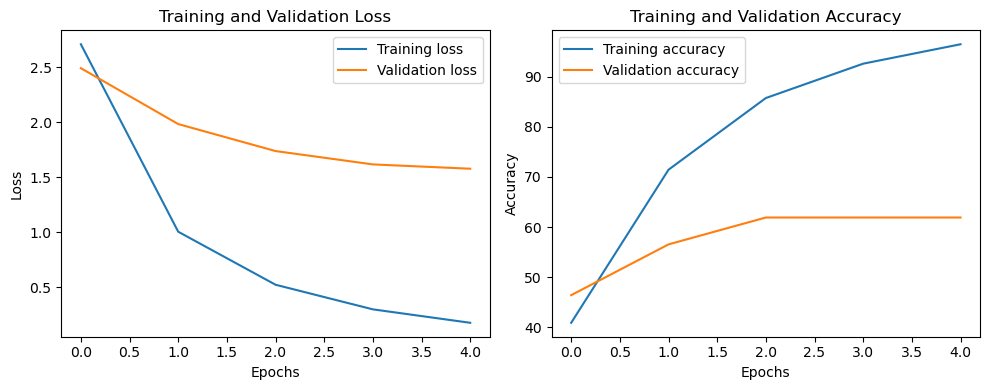

In [123]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the model
model = models.resnet18(pretrained=False)
num_classes = 12
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load('stanford40.pth', map_location=device))  # Load model to the correct device
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

num_epochs = 5

# Lists
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training and validation loops
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Evaluate
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item()

    val_accuracy = 100 * correct / total
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracy}%, Val Loss: {val_losses[-1]}, Val Accuracy: {val_accuracy}%")

# Plotting the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
torch.save(model.state_dict(), 'stanford40_fine_tuned.pth')

In [124]:
import torch
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms

model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 12)
model_path = 'stanford40_fine_tuned.pth'
state_dict = torch.load(model_path)
model.load_state_dict(state_dict)
model.eval()

def evaluate_model(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Set up the DataLoader for the test dataset.
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)

# Evaluate
accuracy = evaluate_model(model, test_loader)
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')

Accuracy of the model on the test dataset: 0.49%


In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torchsummary import summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the modified ResNet18 model
model = models.resnet18(pretrained=False)
num_classes = 12
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load the model weights
model.load_state_dict(torch.load('stanford40_fine_tuned.pth', map_location=device))
model = model.to(device)
model.eval()

# Display the model summary
summary(model, (3, 224, 224))

#  total number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {total_params}')

# TASK 3

## OPTICAL FLOW MIDDLE FRAME

In [23]:
############################################
#TASK 3
############################################
import cv2
import numpy as np
import os
import torchvision.models as models
from torch.utils.data import Dataset
from PIL import Image
import torch.nn as nn
from torchvision import transforms
import torch
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset , Subset
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from sklearn.model_selection import train_test_split

# Optical Flow Extraction Function
def extract_optical_flow(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count // 2 - 1)  # Go to the middle frame

    ret, first_frame = cap.read()
    if not ret:
        print(f"Failed to get the first frame from the video {video_path}")
        return
    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

    ret, second_frame = cap.read()
    if not ret:
        print(f"Failed to get the second frame from the video {video_path}")
        return
    next_gray = cv2.cvtColor(second_frame, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Encode the magnitude to save as an image
    magnitude_image = np.uint8(magnitude)
    cv2.imwrite(output_path, magnitude_image)

    cap.release()


class OpticalFlowDataset(Dataset):
    def __init__(self, file_names, labels, root_dir, transform=None):
        self.file_names = file_names
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
        self.label_to_idx = {label: idx for idx, label in enumerate(sorted(set(labels)))}

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        flow_path = os.path.join(self.root_dir, self.file_names[idx])
        flow_image = Image.open(flow_path).convert('L')

        if self.transform:
            flow_image = self.transform(flow_image)

        label = self.label_to_idx[self.labels[idx]]
        return flow_image, label

class OpticalFlowCNN(nn.Module):
    def __init__(self, num_classes):
        super(OpticalFlowCNN, self).__init__()
        self.base_model = models.resnet18(pretrained=True)
        self.base_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Replace the original fc layer with a new one (
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Identity()  # Remove the original fully connected layer

        # New fully connected layer
        self.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

#directory for video data
video_data_dir = 'video_data'

# Construct full video paths for training and testing
train_video_paths = [os.path.join(video_data_dir, label, file) for file, label in zip(train_files, train_labels)]
test_video_paths = [os.path.join(video_data_dir, label, file) for file, label in zip(test_files, test_labels)]

In [ ]:

optical_flow_dir = 'optical_flow_data'
os.makedirs(optical_flow_dir, exist_ok=True)


# Process training videos for optical flow
for video_path, label in zip(train_video_paths, train_labels):
    # Create the output directory
    class_output_dir = os.path.join(optical_flow_dir, label)
    os.makedirs(class_output_dir, exist_ok=True)

    video_filename = os.path.basename(video_path)
    output_filename = os.path.splitext(video_filename)[0] + '_flow.jpg'
    output_path = os.path.join(class_output_dir, output_filename)

    # save the optical flow image
    extract_optical_flow(video_path, output_path)

# test videos
for video_path, label in zip(test_video_paths, test_labels):
    class_output_dir = os.path.join(optical_flow_dir, label)
    os.makedirs(class_output_dir, exist_ok=True)

    video_filename = os.path.basename(video_path)
    output_filename = os.path.splitext(video_filename)[0] + '_flow.jpg'
    output_path = os.path.join(class_output_dir, output_filename)

    extract_optical_flow(video_path, output_path)


In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import random_split
import torch.nn as nn


# Initialize the training dataset
train_dataset = OpticalFlowDataset(
    [os.path.join(label, os.path.splitext(file)[0] + '_flow.jpg') for file, label in zip(train_files, train_labels)],
    train_labels,
    optical_flow_dir,
    transform=transform
)

# Initialize the validation dataset
val_dataset = OpticalFlowDataset(
    [os.path.join(label, os.path.splitext(file)[0] + '_flow.jpg') for file, label in zip(test_files, test_labels)],
    test_labels,
    optical_flow_dir,
    transform=transform
)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

In [ ]:
# Initialize  model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = OpticalFlowCNN(num_classes=len(set(train_labels))).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Lists
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}%, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}%")


torch.save(model.state_dict(), 'HMDB51_model.pth')

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## OPTICAL FLOW MULTIPLE FRAMES

In [24]:
# from google.colab import drive
import os
import zipfile
# drive.mount('/content/drive')
# !unzip /content/drive/MyDrive/optical_flow_data.zip -d /content/optical_flow_data
# Path to the zip file
zip_path = 'optical_flow_data.zip'

# Directory where the contents will be extracted
extract_to = 'optical_flow_data'

# Creating the directory if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Opening the zip file in read mode
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extracting all the contents into the directory
    zip_ref.extractall(extract_to)

print("Files extracted successfully!")

Files extracted successfully!


In [ ]:
## OPTICAL FLOW WITH 15 IMAGES ##
import os
import cv2
import numpy as np

def extract_and_save_optical_flows(video_path, output_dir, num_flows=9):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    mid_frame = frame_count // 2
    frames_to_capture = range(max(0, mid_frame - num_flows//2), min(frame_count, mid_frame + num_flows//2))
    last_frame = None
    flow_images = []

    for f_id in frames_to_capture:
        cap.set(cv2.CAP_PROP_POS_FRAMES, f_id)
        ret, frame = cap.read()
        if not ret:
            continue
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if last_frame is not None:
            flow = cv2.calcOpticalFlowFarneback(last_frame, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
            magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
            mag_img = np.uint8(magnitude)
            flow_images.append(mag_img)

        last_frame = gray

    # Save each flow image
    for i, img in enumerate(flow_images):
        cv2.imwrite(os.path.join(output_dir, f"{os.path.splitext(os.path.basename(video_path))[0]}_flow_{i}.jpg"), img)

    cap.release()

# saving optical flows
optical_flow_dir = 'optical_flow_data'
for label in keep_hmdb51:
    video_class_dir = os.path.join('video_data', label)
    flow_class_dir = os.path.join(optical_flow_dir, label)
    if not os.path.exists(flow_class_dir):
        os.makedirs(flow_class_dir, exist_ok=True)

    for video_file in os.listdir(video_class_dir):
        video_path = os.path.join(video_class_dir, video_file)
        extract_and_save_optical_flows(video_path, flow_class_dir)

In [ ]:
## CORRECT ##
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
from PIL import Image
from sklearn.preprocessing import LabelEncoder
optical_flow_dir = 'optical_flow_data'
label_encoder = LabelEncoder()
label_encoder.fit(action_categories)

class OpticalFlowDataset(Dataset):
    def __init__(self, video_files, labels, root_dir, transform=None):
        self.video_files = video_files
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.video_files)

    def __getitem__(self, idx):
        base_filename = os.path.splitext(self.video_files[idx])[0]
        video_label = self.labels[idx]
        video_path = os.path.join(self.root_dir, video_label)

        flow_images = []
        for i in range(15):
            flow_filename = f"{base_filename}_flow_{i}.jpg"
            flow_filepath = os.path.join(video_path, flow_filename)
            try:
                img = Image.open(flow_filepath)
                if self.transform:
                    img = self.transform(img)
                flow_images.append(img)
            except FileNotFoundError:
                print(f"Error: File not found - {flow_filepath}")

        if not flow_images:
            raise RuntimeError(f"No flow images were loaded for video: {self.video_files[idx]}")

        # Stack images
        flow_stacked = torch.cat(flow_images, dim=0)
        label = self.label_encoder.transform([video_label])[0]
        label = torch.tensor(label, dtype=torch.long)  # Ensure label is tensor
        return flow_stacked, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


unique_videos = list(set([os.path.splitext(file)[0] for file in train_files]))

# Split the unique videos into training and validation
train_videos, val_videos = train_test_split(unique_videos, test_size=0.2, random_state=42)

# Filter
new_train_files = [file for file in train_files if os.path.splitext(file)[0] in train_videos]
new_val_files = [file for file in train_files if os.path.splitext(file)[0] in val_videos]

# Corresponding labels
new_train_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in train_videos]
new_val_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in val_videos]

# Create datasets
train_dataset = OpticalFlowDataset(new_train_files, new_train_labels, optical_flow_dir, transform=transform)
val_dataset = OpticalFlowDataset(new_val_files, new_val_labels, optical_flow_dir, transform=transform)
test_dataset = OpticalFlowDataset(test_files, test_labels, optical_flow_dir, transform=transform)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

class OpticalFlowCNN(nn.Module):
    def __init__(self, num_classes):
        super(OpticalFlowCNN, self).__init__()
        self.base_model = resnet18(pretrained=True)
        self.base_model.conv1 = nn.Conv2d(15, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Identity()
        self.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize the model
num_classes = 12
model = OpticalFlowCNN(num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Lists
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 7

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_accuracy:.2f}%, Val Loss = {val_loss:.4f}, Val Accuracy = {val_accuracy:.2f}%")

# Save the trained model weights
torch.save(model.state_dict(), 'HMDB51_model_16.pth')

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
## EVALUATION ##
import torch
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms


model = models.resnet18(pretrained=False)
# Adjust the first convolutional layer
model.conv1 = nn.Conv2d(15, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 12)

# Load weights
model_path = 'HMDB51_model_16.pth'
state_dict = torch.load(model_path)
new_state_dict = {key.replace('base_model.', ''): value for key, value in state_dict.items()}
model.load_state_dict(new_state_dict)# Set to evaluation mode
model.eval()

# evaluation
def evaluate_model(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Set up the DataLoader for the test dataset.
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Evaluate the model
accuracy = evaluate_model(model, test_loader)
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')

## OPTICAL FLOW 8 FRAMES

In [ ]:
## CORRECT ##
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
from PIL import Image
from sklearn.preprocessing import LabelEncoder
optical_flow_dir = 'optical_flow_data'
# Assuming 'action_categories' contains all unique action class labels
label_encoder = LabelEncoder()
label_encoder.fit(action_categories)

class OpticalFlowDataset(Dataset):
    def __init__(self, video_files, labels, root_dir, transform=None):
        self.video_files = video_files
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.video_files)

    def __getitem__(self, idx):
        base_filename = os.path.splitext(self.video_files[idx])[0]
        video_label = self.labels[idx]
        video_path = os.path.join(self.root_dir, video_label)

        flow_images = []
        for i in range(8):
            flow_filename = f"{base_filename}_flow_{i}.jpg"
            flow_filepath = os.path.join(video_path, flow_filename)
            try:
                img = Image.open(flow_filepath)
                if self.transform:
                    img = self.transform(img)
                flow_images.append(img)
            except FileNotFoundError:
                print(f"Error: File not found - {flow_filepath}")

        if not flow_images:
            raise RuntimeError(f"No flow images were loaded for video: {self.video_files[idx]}")

        # Stack images
        flow_stacked = torch.cat(flow_images, dim=0)
        label = self.label_encoder.transform([video_label])[0]
        label = torch.tensor(label, dtype=torch.long)
        return flow_stacked, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

unique_videos = list(set([os.path.splitext(file)[0] for file in train_files]))

# Split the unique videos into training and validation
train_videos, val_videos = train_test_split(unique_videos, test_size=0.2, random_state=42)

# Filter
new_train_files = [file for file in train_files if os.path.splitext(file)[0] in train_videos]
new_val_files = [file for file in train_files if os.path.splitext(file)[0] in val_videos]

# Corresponding labels for the new train and validation files
new_train_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in train_videos]
new_val_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in val_videos]

# Create datasets
train_dataset = OpticalFlowDataset(new_train_files, new_train_labels, optical_flow_dir, transform=transform)
val_dataset = OpticalFlowDataset(new_val_files, new_val_labels, optical_flow_dir, transform=transform)
test_dataset = OpticalFlowDataset(test_files, test_labels, optical_flow_dir, transform=transform)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

class OpticalFlowCNN(nn.Module):
    def __init__(self, num_classes):
        super(OpticalFlowCNN, self).__init__()
        self.base_model = resnet18(pretrained=True)
        self.base_model.conv1 = nn.Conv2d(8, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Identity()
        self.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_classes = 12
model = OpticalFlowCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Lists
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_accuracy:.2f}%, Val Loss = {val_loss:.4f}, Val Accuracy = {val_accuracy:.2f}%")

# Save the trained model weights
torch.save(model.state_dict(), 'HMDB51_model_8_edited.pth')

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
## EVALUATION ##
import torch
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms

model = models.resnet18(pretrained=False)
# Adjust the first convolutional layer
model.conv1 = nn.Conv2d(8, 64, kernel_size=7, stride=2, padding=3, bias=False)

model.fc = nn.Linear(model.fc.in_features, 12)

# Load weights
model_path = 'HMDB51_model_8.pth'
state_dict = torch.load(model_path)
new_state_dict = {key.replace('base_model.', ''): value for key, value in state_dict.items()}
model.load_state_dict(new_state_dict)


model.eval()
# evaluation
def evaluate_model(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Set up the DataLoader for the test dataset.
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Evaluate the model
accuracy = evaluate_model(model, test_loader)
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')

In [ ]:
# Initialize  model
model = OpticalFlowCNN(num_classes=12)

# Load  weights
model.load_state_dict(torch.load('HMDB51_model_8.pth', map_location=torch.device('cpu')))
model.eval()  # Set to evaluation mode

summary(model, (8, 224, 224))

#  total number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total number of parameters: {total_params}')

## CHOICE 2

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
from PIL import Image
from sklearn.preprocessing import LabelEncoder
optical_flow_dir = 'optical_flow_data'
label_encoder = LabelEncoder()
label_encoder.fit(action_categories)

class OpticalFlowDataset(Dataset):
    def __init__(self, video_files, labels, root_dir, transform=None):
        self.video_files = video_files
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.video_files)

    def __getitem__(self, idx):
        base_filename = os.path.splitext(self.video_files[idx])[0]
        video_label = self.labels[idx]
        video_path = os.path.join(self.root_dir, video_label)

        flow_images = []
        for i in range(8):
            flow_filename = f"{base_filename}_flow_{i}.jpg"
            flow_filepath = os.path.join(video_path, flow_filename)
            try:
                img = Image.open(flow_filepath)
                if self.transform:
                    img = self.transform(img)
                flow_images.append(img)
            except FileNotFoundError:
                print(f"Error: File not found - {flow_filepath}")

        if not flow_images:
            raise RuntimeError(f"No flow images were loaded for video: {self.video_files[idx]}")

        # Stack images
        flow_stacked = torch.cat(flow_images, dim=0)
        label = self.label_encoder.transform([video_label])[0]
        label = torch.tensor(label, dtype=torch.long)  # Ensure label is tensor
        return flow_stacked, label

#transformations with augmentation for training
train_transform = transforms.Compose([
    # transforms.Resize((256, 256)),
    transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.0)),  # Random crop with scaling
    transforms.RandomHorizontalFlip(p=0.5),  # Flip horizontally with a probability of 0.5
    transforms.RandomRotation(degrees=10),  # Random rotation between -10 and 10 degrees
    transforms.ToTensor()  # Convert to tensor for model input
])
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

unique_videos = list(set([os.path.splitext(file)[0] for file in train_files]))

# Split the unique videos into training and validation
train_videos, val_videos = train_test_split(unique_videos, test_size=0.2, random_state=42)

# Filter
new_train_files = [file for file in train_files if os.path.splitext(file)[0] in train_videos]
new_val_files = [file for file in train_files if os.path.splitext(file)[0] in val_videos]

# Corresponding labels for the new train and validation files
new_train_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in train_videos]
new_val_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in val_videos]

# Create datasets
train_dataset = OpticalFlowDataset(new_train_files, new_train_labels, optical_flow_dir, transform=train_transform)
val_dataset = OpticalFlowDataset(new_val_files, new_val_labels, optical_flow_dir, transform=train_transform)
test_dataset = OpticalFlowDataset(test_files, test_labels, optical_flow_dir, transform=transform)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18

class OpticalFlowCNN(nn.Module):
    def __init__(self, num_classes):
        super(OpticalFlowCNN, self).__init__()
        self.base_model = resnet18(pretrained=True)
        self.base_model.conv1 = nn.Conv2d(8, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Identity()
        self.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_classes = 12
model = OpticalFlowCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Lists
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
num_epochs = 14

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_accuracy:.2f}%, Val Loss = {val_loss:.4f}, Val Accuracy = {val_accuracy:.2f}%")

# Save the trained model weights
torch.save(model.state_dict(), 'HMDB51_model_16_augmented.pth')


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
## EVALUATION ##
import torch
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms

model = models.resnet18(pretrained=False)
# Adjust the first convolutional layer
model.conv1 = nn.Conv2d(8, 64, kernel_size=7, stride=2, padding=3, bias=False)

model.fc = nn.Linear(model.fc.in_features, 12)

# Load weights
model_path = 'HMDB51_model_16_augmented.pth'
state_dict = torch.load(model_path)
new_state_dict = {key.replace('base_model.', ''): value for key, value in state_dict.items()}
model.load_state_dict(new_state_dict)

model.eval()
#evaluation
def evaluate_model(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Set up the DataLoader for the test dataset.
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Evaluate the model
accuracy = evaluate_model(model, test_loader)
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')

## CHOICE 8


In [25]:
## CORRECT ##
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import torch
from PIL import Image
from sklearn.preprocessing import LabelEncoder
optical_flow_dir = 'optical_flow_data'
label_encoder = LabelEncoder()
label_encoder.fit(action_categories)  #

class OpticalFlowDataset(Dataset):
    def __init__(self, video_files, labels, root_dir, transform=None):
        self.video_files = video_files
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.video_files)

    def __getitem__(self, idx):
        base_filename = os.path.splitext(self.video_files[idx])[0]
        video_label = self.labels[idx]
        video_path = os.path.join(self.root_dir, video_label)

        flow_images = []
        for i in range(8):
            flow_filename = f"{base_filename}_flow_{2*i}.jpg"
            flow_filepath = os.path.join(video_path, flow_filename)
            try:
                img = Image.open(flow_filepath)
                if self.transform:
                    img = self.transform(img)
                flow_images.append(img)
            except FileNotFoundError:
                print(f"Error: File not found - {flow_filepath}")

        if not flow_images:
            raise RuntimeError(f"No flow images were loaded for video: {self.video_files[idx]}")

        # Stack images
        flow_stacked = torch.cat(flow_images, dim=0)
        label = self.label_encoder.transform([video_label])[0]
        label = torch.tensor(label, dtype=torch.long)  # Ensure label is tensor
        return flow_stacked, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

unique_videos = list(set([os.path.splitext(file)[0] for file in train_files]))

# Split the unique videos into training and validation
train_videos, val_videos = train_test_split(unique_videos, test_size=0.2, random_state=42)

# Filter
new_train_files = [file for file in train_files if os.path.splitext(file)[0] in train_videos]
new_val_files = [file for file in train_files if os.path.splitext(file)[0] in val_videos]

# Corresponding labels for the new train and validation files
new_train_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in train_videos]
new_val_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in val_videos]

# Create datasets
train_dataset = OpticalFlowDataset(new_train_files, new_train_labels, optical_flow_dir, transform=transform)
val_dataset = OpticalFlowDataset(new_val_files, new_val_labels, optical_flow_dir, transform=transform)
test_dataset = OpticalFlowDataset(test_files, test_labels, optical_flow_dir, transform=transform)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)
test_loader_hmdb = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)

In [26]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

stanford_model = models.resnet18(pretrained=False)
num_classes= 12
stanford_model.fc = nn.Linear(stanford_model.fc.in_features, num_classes)
# Load the trained weights
stanford_model = stanford_model.to(device)
stanford_model.eval()
stanford_model.load_state_dict(torch.load('stanford40.pth', map_location=device))


hmdb51_model = OpticalFlowCNN(num_classes)

# Load the trained weights
hmdb51_model.load_state_dict(torch.load('HMDB51_model_8.pth', map_location=device))
hmdb51_model = hmdb51_model.to(device)
hmdb51_model.eval()
def evaluate_model(model, data_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy
def get_all_predictions(model, data_loader, device):
    model.eval()
    all_preds = []
    true_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return true_labels, all_preds
true_labels_stanford, predictions_stanford = get_all_predictions(stanford_model, test_loader, device)
true_labels_hmdb, predictions_hmdb = get_all_predictions(hmdb51_model, test_loader_hmdb, device)

C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


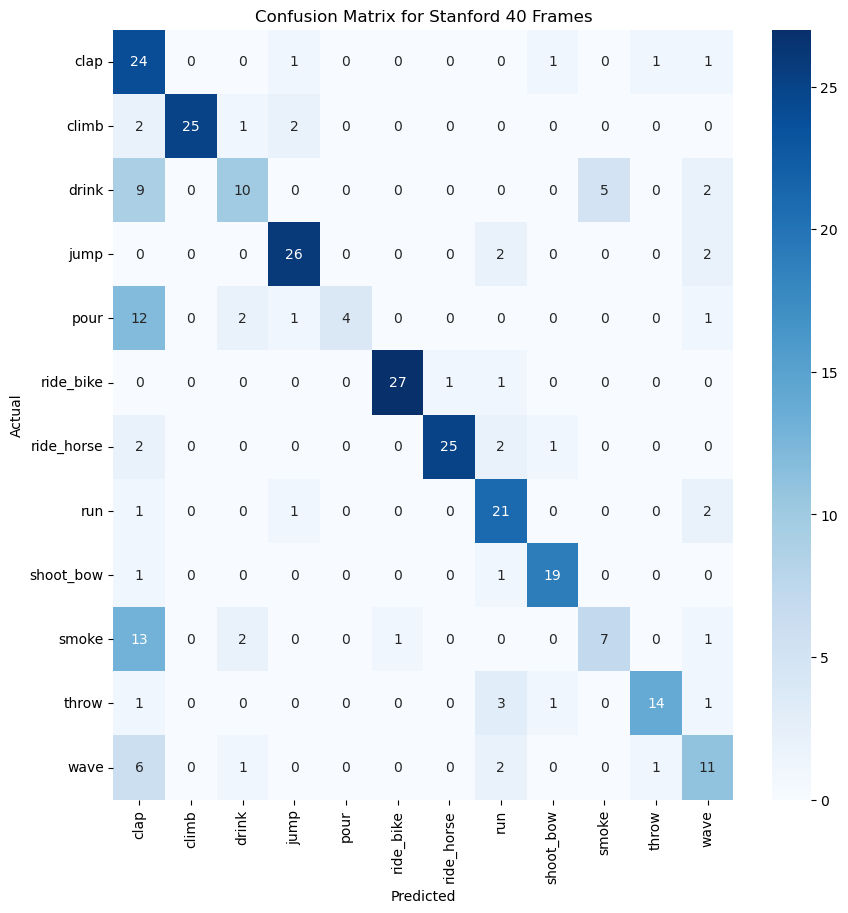

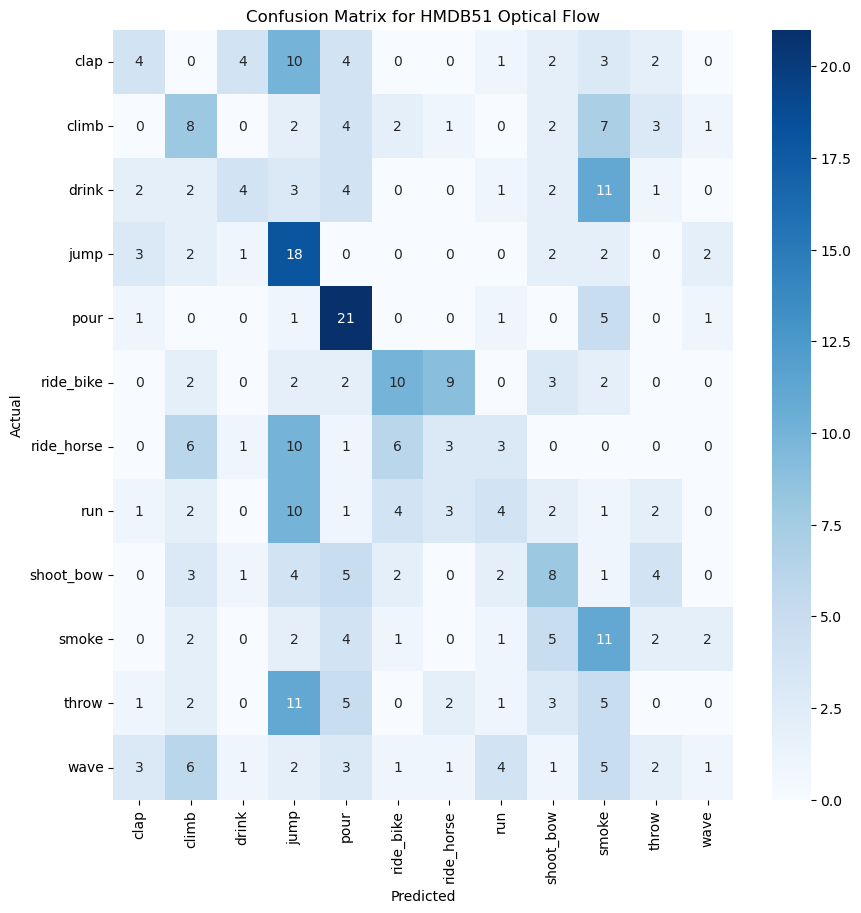

In [27]:
import seaborn as sns

def plot_confusion_matrix(true_labels, predictions, classes, title):
    cm = confusion_matrix(true_labels, predictions, labels=np.arange(len(classes)))
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


plot_confusion_matrix(true_labels_stanford, predictions_stanford, action_categories, "Confusion Matrix for Stanford 40 Frames")
plot_confusion_matrix(true_labels_hmdb, predictions_hmdb, action_categories, "Confusion Matrix for HMDB51 Optical Flow")


# TASK 4

In [44]:
## DATA PREPARATION ##
import cv2
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
from PIL import Image
from sklearn.preprocessing import LabelEncoder
optical_flow_dir = 'optical_flow_data'
label_encoder = LabelEncoder()
label_encoder.fit(action_categories)
class OpticalFlowDataset(Dataset):
    def __init__(self, video_files, labels, root_dir, transform=None):
        self.video_files = video_files
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.video_files)

    def __getitem__(self, idx):
        base_filename = os.path.splitext(self.video_files[idx])[0]
        video_label = self.labels[idx]
        video_path = os.path.join(self.root_dir, video_label)

        flow_images = []
        for i in range(8):
            flow_filename = f"{base_filename}_flow_{i*2}.jpg"
            flow_filepath = os.path.join(video_path, flow_filename)
            try:
                img = Image.open(flow_filepath)
                if self.transform:
                    img = self.transform(img)
                flow_images.append(img)
            except FileNotFoundError:
                print(f"Error: File not found - {flow_filepath}")

        if not flow_images:
            raise RuntimeError(f"No flow images were loaded for video: {self.video_files[idx]}")

        flow_stacked = torch.cat(flow_images, dim=0)
        label = self.label_encoder.transform([video_label])[0]
        label = torch.tensor(label, dtype=torch.long)  # Ensure label is tensor
        return flow_stacked, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

unique_videos = list(set([os.path.splitext(file)[0] for file in train_files]))

# Split the unique videos into training and validation sets
train_videos, val_videos = train_test_split(unique_videos, test_size=0.2, random_state=42)

# Filter
new_train_files = [file for file in train_files if os.path.splitext(file)[0] in train_videos]
new_val_files = [file for file in train_files if os.path.splitext(file)[0] in val_videos]

# Corresponding labels for the new train and validation files
new_train_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in train_videos]
new_val_labels = [label for file, label in zip(train_files, train_labels) if os.path.splitext(file)[0] in val_videos]

# Create datasets
train_dataset = OpticalFlowDataset(new_train_files, new_train_labels, optical_flow_dir, transform=transform)
val_dataset = OpticalFlowDataset(new_val_files, new_val_labels, optical_flow_dir, transform=transform)
test_dataset = OpticalFlowDataset(test_files, test_labels, optical_flow_dir, transform=transform)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)


class FrameDataset(Dataset):
    def __init__(self, video_files, labels, root_dir, transform=None):
        self.video_files = video_files
        self.labels = labels
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.video_files)

    def __getitem__(self, idx):
        video_label = self.labels[idx]
        video_filename = self.video_files[idx]
        video_path = os.path.join(self.root_dir, video_label, video_filename)

        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count // 2)  # Go to the middle frame
        ret, frame = cap.read()
        cap.release()

        if not ret:
            raise FileNotFoundError(f"Could not read frame from video: {video_path}")

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame)

        if self.transform:
            img = self.transform(img)
        label = self.label_encoder.transform([video_label])[0]
        label = torch.tensor(label, dtype=torch.long)
        return img, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
video_dir = 'video_data'
# Create frame datasets
train_dataset_frame = FrameDataset(new_train_files, new_train_labels, video_dir, transform=transform)
val_dataset_frame = FrameDataset(new_val_files, new_val_labels, video_dir, transform=transform)
test_dataset_frame = FrameDataset(test_files, test_labels, video_dir, transform=transform)

# Initialize DataLoaders for frame datasets
train_loader_frame = DataLoader(train_dataset_frame, batch_size=64, shuffle=False, num_workers=0)
val_loader_frame = DataLoader(val_dataset_frame, batch_size=64, shuffle=False, num_workers=0)
test_loader_frame = DataLoader(test_dataset_frame, batch_size=64, shuffle=False, num_workers=0)


In [45]:
print("Sizes of the Datasets:")
print(f"Optical Flow - Train Dataset Size: {len(train_dataset)}")
print(f"Optical Flow - Validation Dataset Size: {len(val_dataset)}")
print(f"Optical Flow - Test Dataset Size: {len(test_dataset)}")

print(f"Frame Image - Train Dataset Size: {len(train_dataset_frame)}")
print(f"Frame Image - Validation Dataset Size: {len(val_dataset_frame)}")
print(f"Frame Image - Test Dataset Size: {len(test_dataset_frame)}")

Sizes of the Datasets:
Optical Flow - Train Dataset Size: 672
Optical Flow - Validation Dataset Size: 168
Optical Flow - Test Dataset Size: 360
Frame Image - Train Dataset Size: 672
Frame Image - Validation Dataset Size: 168
Frame Image - Test Dataset Size: 360


In [12]:
first_data, first_label = train_dataset[100]

label_name = label_encoder.inverse_transform([first_label.item()])[0]

print("First label in train_dataset:", label_name)

First label in train_dataset: climb


In [92]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import resnet18
## two stream initialization
class TwoStreamModel(nn.Module):
    def __init__(self, frame_model_path, flow_model_path, num_classes):
        super(TwoStreamModel, self).__init__()

        # Load frame model
        self.frame_model = models.resnet18(pretrained=False)
        num_ftrs_frame = self.frame_model.fc.in_features
        self.frame_model.fc = nn.Linear(num_ftrs_frame, num_classes)
        self.frame_model.load_state_dict(torch.load(frame_model_path))

        # Load flow model
        self.flow_model = OpticalFlowCNN(num_classes)
        self.flow_model.load_state_dict(torch.load(flow_model_path))

        #  fusion
        self.fc_fusion = nn.Linear(num_classes * 2, num_classes)


    def forward(self, frame_inputs, flow_inputs):
        # Forward pass through frame model
        frame_outputs = self.frame_model(frame_inputs)

        # Forward pass through flow model
        flow_outputs = self.flow_model(flow_inputs)

        # Concatenate outputs
        combined_outputs = torch.cat((frame_outputs, flow_outputs), dim=1)

        fused_outputs = self.fc_fusion(combined_outputs)

        return fused_outputs

class OpticalFlowCNN(nn.Module):
    def __init__(self, num_classes):
        super(OpticalFlowCNN, self).__init__()
        self.base_model = resnet18(pretrained=True)
        self.base_model.conv1 = nn.Conv2d(8, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Identity()
        self.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.base_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load  pre-trained models
frame_model_path = "stanford40_fine_tuned.pth"
flow_model_path = "HMDB51_model_8.pth"


In [93]:
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_classes = 12
model = TwoStreamModel( frame_model_path, flow_model_path,num_classes)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [94]:
import matplotlib.pyplot as plt

# Lists
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Epoch 1, Train Loss: 3.6208, Train Acc: 0.0298, Val Loss: 48.1556, Val Acc: 0.0885
Epoch 2, Train Loss: 2.4847, Train Acc: 0.1009, Val Loss: 3.2250, Val Acc: 0.1781
Epoch 3, Train Loss: 2.2968, Train Acc: 0.2145, Val Loss: 2.0571, Val Acc: 0.3271
Epoch 4, Train Loss: 2.1189, Train Acc: 0.2386, Val Loss: 2.0246, Val Acc: 0.3156
Epoch 5, Train Loss: 1.8810, Train Acc: 0.3864, Val Loss: 2.0522, Val Acc: 0.3531
Epoch 6, Train Loss: 1.6818, Train Acc: 0.4773, Val Loss: 1.9056, Val Acc: 0.3833
Epoch 7, Train Loss: 1.4671, Train Acc: 0.6236, Val Loss: 1.9580, Val Acc: 0.3385
Epoch 8, Train Loss: 1.3074, Train Acc: 0.7358, Val Loss: 1.7791, Val Acc: 0.4208
Epoch 9, Train Loss: 1.0759, Train Acc: 0.8310, Val Loss: 1.8263, Val Acc: 0.3958
Epoch 10, Train Loss: 0.8727, Train Acc: 0.9361, Val Loss: 1.7763, Val Acc: 0.4562
Epoch 11, Train Loss: 0.6838, Train Acc: 0.9616, Val Loss: 1.8415, Val Acc: 0.4229
Epoch 12, Train Loss: 0.5522, Train Acc: 0.9730, Val Loss: 1.8703, Val Acc: 0.4031
Epoch 13, Tr

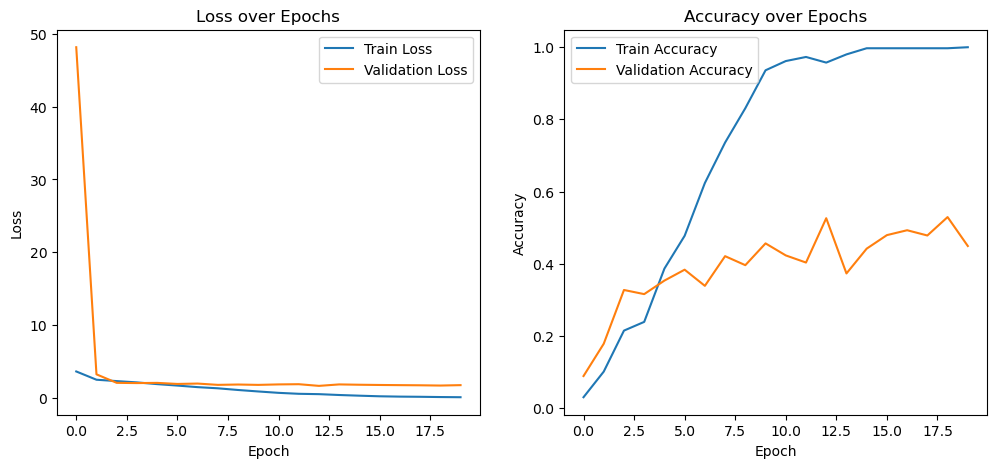

In [95]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss, running_accuracy = 0, 0

    for ((frame_inputs, frame_labels), (flow_inputs, flow_labels)) in zip(train_loader_frame, train_loader):
        frame_inputs, flow_inputs, labels = frame_inputs.to(device), flow_inputs.to(device), frame_labels.to(device)

        optimizer.zero_grad()
        outputs = model(frame_inputs, flow_inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_accuracy += accuracy(outputs, labels)

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(running_accuracy / len(train_loader))

    # Validation
    model.eval()
    val_loss, val_accuracy = 0, 0
    with torch.no_grad():
        for ((frame_inputs, frame_labels), (flow_inputs, flow_labels)) in zip(val_loader_frame, val_loader):
            frame_inputs, flow_inputs, labels = frame_inputs.to(device), flow_inputs.to(device), frame_labels.to(device)
            outputs = model(frame_inputs, flow_inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy += accuracy(outputs, labels)

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy / len(val_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')

# Plotting training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

torch.save(model.state_dict(), 'two_stream_model.pth')

C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Train Loss: 2.5345, Train Acc: 0.0795, Val Loss: 2.4666, Val Acc: 0.1406
Epoch 2, Train Loss: 2.5051, Train Acc: 0.1151, Val Loss: 2.4357, Val Acc: 0.1177
Epoch 3, Train Loss: 2.4532, Train Acc: 0.1506, Val Loss: 2.4834, Val Acc: 0.0833
Epoch 4, Train Loss: 2.4628, Train Acc: 0.1491, Val Loss: 2.4261, Val Acc: 0.1365
Epoch 5, Train Loss: 2.4285, Train Acc: 0.1676, Val Loss: 2.3962, Val Acc: 0.1990
Epoch 6, Train Loss: 2.4081, Train Acc: 0.1847, Val Loss: 2.4185, Val Acc: 0.1667
Epoch 7, Train Loss: 2.3498, Train Acc: 0.2244, Val Loss: 2.3687, Val Acc: 0.1990
Epoch 8, Train Loss: 2.3319, Train Acc: 0.2614, Val Loss: 2.3561, Val Acc: 0.2208
Epoch 9, Train Loss: 2.2828, Train Acc: 0.3011, Val Loss: 2.3841, Val Acc: 0.1427
Epoch 10, Train Loss: 2.2400, Train Acc: 0.3281, Val Loss: 2.3006, Val Acc: 0.3063
Epoch 11, Train Loss: 2.2248, Train Acc: 0.3722, Val Loss: 2.3022, Val Acc: 0.3052
Epoch 12, Train Loss: 2.1869, Train Acc: 0.4062, Val Loss: 2.2539, Val Acc: 0.3354
Epoch 13, Tra

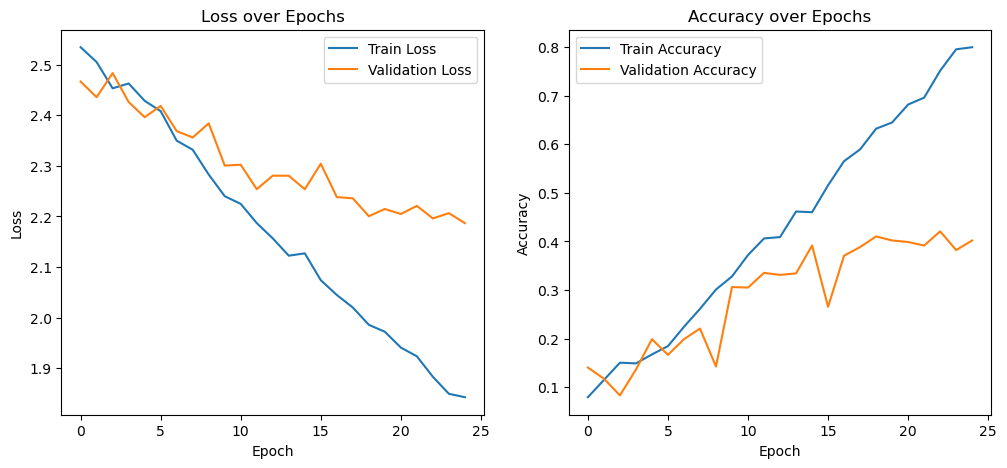

In [62]:
####
#VARIATION OF 2 STREAM CNN
####
import torch.nn.functional as F
class TwoStreamModel(nn.Module):
    def __init__(self, frame_model_path, flow_model_path, num_classes):
        super(TwoStreamModel, self).__init__()

        # Load and set up the frame model
        self.frame_model = models.resnet18(pretrained=False)
        num_ftrs_frame = self.frame_model.fc.in_features
        self.frame_model.fc = nn.Linear(num_ftrs_frame, num_classes)  # Redefine FC layer
        self.frame_model.load_state_dict(torch.load(frame_model_path))

        # Load and set up the flow model
        self.flow_model = OpticalFlowCNN(num_classes)
        self.flow_model.load_state_dict(torch.load(flow_model_path))

    def forward(self, frame_inputs, flow_inputs):
        # Extract features from frame model
        frame_features = self.frame_model(frame_inputs)
        # Extract features from flow model
        flow_features = self.flow_model(flow_inputs)

        frame_probs = F.softmax(frame_features, dim=1)
        flow_probs = F.softmax(flow_features, dim=1)

        # Max fusion: element-wise maximum of probabilities from both streams
        fused_outputs = torch.max(frame_probs, flow_probs)

        return fused_outputs

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_classes = 12  # Assuming you have 12 action categories
model = TwoStreamModel( frame_model_path, flow_model_path,num_classes)
model.to(device)


# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Metrics storage
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss, running_accuracy = 0, 0

    for ((frame_inputs, frame_labels), (flow_inputs, flow_labels)) in zip(train_loader_frame, train_loader):
        frame_inputs, flow_inputs, labels = frame_inputs.to(device), flow_inputs.to(device), frame_labels.to(device)

        optimizer.zero_grad()
        outputs = model(frame_inputs, flow_inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_accuracy += accuracy(outputs, labels)

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(running_accuracy / len(train_loader))

    # Validation
    model.eval()
    val_loss, val_accuracy = 0, 0
    with torch.no_grad():
        for ((frame_inputs, frame_labels), (flow_inputs, flow_labels)) in zip(val_loader_frame, val_loader):
            frame_inputs, flow_inputs, labels = frame_inputs.to(device), flow_inputs.to(device), frame_labels.to(device)
            outputs = model(frame_inputs, flow_inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy += accuracy(outputs, labels)

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy / len(val_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')

# Plotting training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [96]:
#TESTING
model.eval()
# Testing
def evaluate_model(model):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total = 0
    correct = 0
    with torch.no_grad():
         for ((frame_inputs, frame_labels), (flow_inputs, flow_labels)) in zip(test_loader_frame, test_loader):
            frame_inputs, flow_inputs, labels = frame_inputs.to(device), flow_inputs.to(device), frame_labels.to(device)
            outputs = model(frame_inputs, flow_inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Evaluate the model
accuracy = evaluate_model(model)
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')

Accuracy of the model on the test dataset: 0.24%


In [125]:
model =TwoStreamModel( frame_model_path, flow_model_path,num_classes)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
train_losses = [2.5345, 2.5051, 2.4532, 2.4628, 2.4285, 2.4081, 2.3498, 2.331
print(f'Total number of parameters: {total_params}')

C:\Users\User\anaconda3\envs\Workspace\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total number of parameters: 22381316
